<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M4Sesi%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Módulo 4**
**Sesión 3**
Exploración de Variables Categóricas y Análisis Multivariable

- Identificar distintas técnicas para explorar y visualizar variables categóricas.
- Añadir anotaciones a nuestras gráficas para hacerlas más comprensibles.
- Utilizar gráficas de barras.
- Graficar un conjunto de datos agrupado de acuerdo a dos variables categóricas.
- Producir más de una gráfica al mismo tiempo para compararlas.
- Graficar un conjunto de datos numéricos agrupados de acuerdo a una variable categórica.

**Ejemplo 1**
Anotando nuestras gráficas

- Aprender a añadir títulos, anotaciones y leyendas a nuestras gráficas
- Aprender a cambiar los tamaños de nuestras gráficas y modificar la dirección de nuestros tics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
#Cargar dataset desde Drive, carpeta de Archivos ¬ Datasets
df = pd.read_csv("/content/drive/MyDrive/Datasets/athlete_olympic_events-clean.csv", index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Conteo'),
 Text(0.5, 0, 'Edad'),
 Text(0.5, 1.0, 'Edades de atletas participantes en Juegos Olímpicos')]

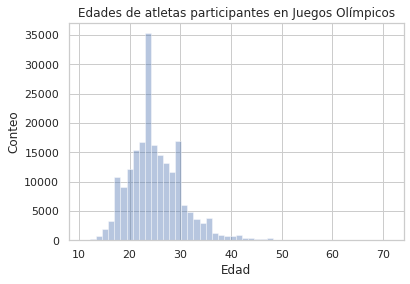

In [3]:
#Gráfica de distribución
#Con distplot
# ax = ejes u objeto de matplotlib, kde distribución gausiana, norm_hist normalizar valores
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title="Edades de atletas participantes en Juegos Olímpicos", xlabel='Edad', ylabel='Conteo')

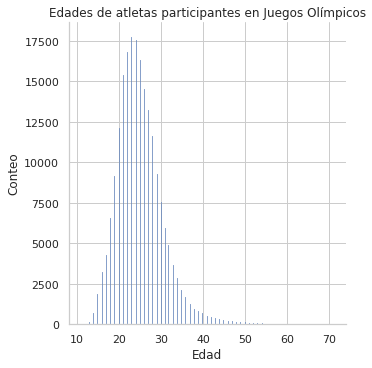

In [4]:
#Debido a que distplot lo van a retirar, de ahora en adelante se puede hacer así
#Con displot
ax = sns.displot(df['age'], kde=False)
ax.set(title="Edades de atletas participantes en Juegos Olímpicos", xlabel='Edad', ylabel='Conteo');
#En Jupyter cuando se agrega punto y coma al final (;), en el cuadro de resultado se elimina el mensaje de la última línea de ejecución
#en este caso, al poner ; al final, ya no aparece: <seaborn.axisgrid.FacetGrid at 0x7f19e021f650>

In [5]:
#Promediar altura por participante utilizando el index
por_atleta = df.groupby(level=0)[['age', 'height', 'weight']].mean()
por_genero = df.groupby(level=0)['sex'].last()
unidos = por_atleta.merge(por_genero, left_index=True, right_index=True)
hombres = por_atleta[unidos['sex'] == 'M']
mujeres = por_atleta[unidos['sex'] == 'F']

In [6]:
mujeres.head()

,age,height,weight
athlete_id,,,
5,24.333333,185.0,82.0
13,32.000000,159.0,55.5
14,32.000000,171.0,65.0
22,22.000000,170.0,125.0
26,17.000000,169.0,65.0


In [7]:
hombres.head()

,age,height,weight
athlete_id,,,
1,24.0,180.0,80.0
2,23.0,170.0,60.0
6,32.0,188.0,75.0
7,32.0,183.0,72.0
9,26.0,186.0,96.0


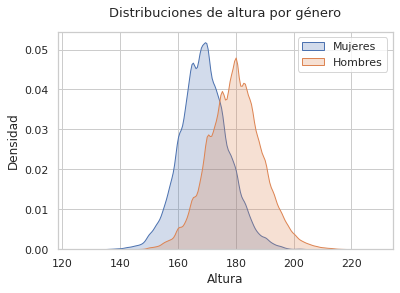

In [8]:
#Gráfica forma 1: "plt" ó "pyplot"
sns.kdeplot(mujeres['height'], shade=True, label='Mujeres')
sns.kdeplot(hombres['height'], shade=True, label='Hombres')
# plt objeto global para graficar
#Título fontsize=tamaño de letra y pad=separación entre título y gráfica
plt.title('Distribuciones de altura por género', fontsize=13, pad=15)
plt.xlabel('Altura')
plt.ylabel('Densidad')
#Leyenda, loc para indicar dónde se ubicará
plt.legend(loc='upper right')
#También se puede quitar el mensaje final de texto para que sólo muestre la gráfica con plt.show() como el ; al final
plt.show()

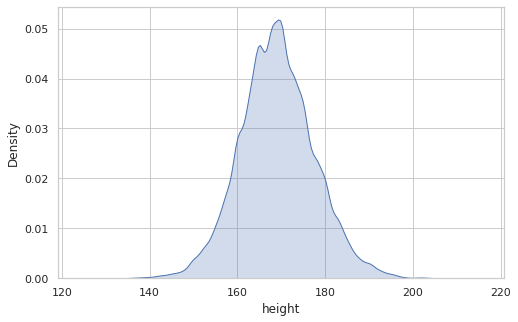

In [9]:
#Gráfica forma 2: "fig" y "ax"
#Para cambiar tamaño de la figura (ancho, alto)
fig = plt.figure(figsize=(8,5))
ax = sns.kdeplot(mujeres['height'], shade=True, label='Mujeres')

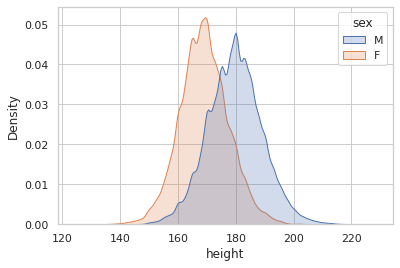

In [11]:
#Gráfica forma 3: "kdeplot"
# hue = para divididir los datos por una variable
# common_norm= manera para calcular la densidad, True con el total de elementos (toda la población, M+F), False lo calcula independiente (sólo M o F)
sns.kdeplot(data=unidos, x='height', hue='sex', common_norm=False, shade=True);

**Reto 1**
Anotando gráficas

- Aprender a hacer gráficas más claras añadiendo anotaciones y cambiando el tamaño

1. Aumenta de tamaño la gráfica si consideras que sería más comprensible de esa manera.
1. Donde sea adecuado, añade títulos, nombres de ejes y leyendas

In [12]:
diabetes = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes-clean.csv', index_col=0)
diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


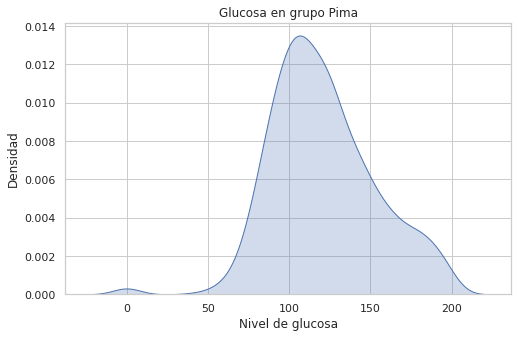

In [26]:
#Gráfica 1 KDE
fig = plt.figure(figsize=(8,5))
ax = sns.kdeplot(data=diabetes, x='glucose', hue=None, common_norm=False, shade=True)
ax.set(title="Glucosa en grupo Pima", xlabel="Nivel de glucosa", ylabel="Densidad");

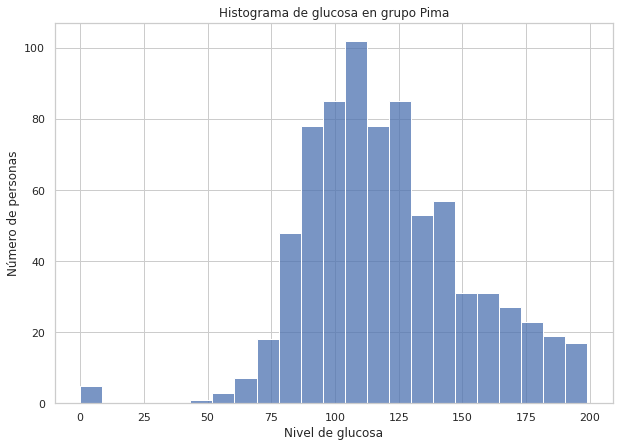

In [25]:
#Gráfica 1, otra forma
fig = plt.figure(figsize=(10,7))
ax = sns.histplot(diabetes['glucose'], kde=False, palette=None)
ax.set(title="Histograma de glucosa en grupo Pima", xlabel='Nivel de glucosa', ylabel='Número de personas');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


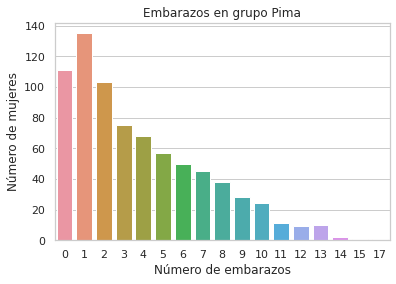

In [27]:
#Gráfica 2
pregnancy_counts = diabetes['pregnancies'].value_counts()
ax = sns.barplot(pregnancy_counts.index, pregnancy_counts)
ax.set(title='Embarazos en grupo Pima', xlabel='Número de embarazos', ylabel='Número de mujeres');

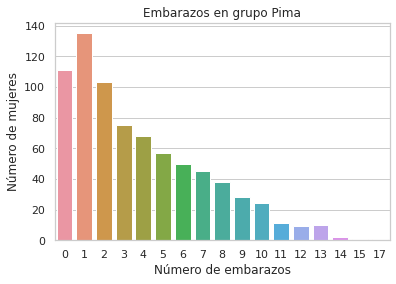

In [33]:
# Gráfica 2, otra forma
ax = sns.countplot(x='pregnancies', data=diabetes)
ax.set(title='Embarazos en grupo Pima', xlabel='Número de embarazos', ylabel='Número de mujeres');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


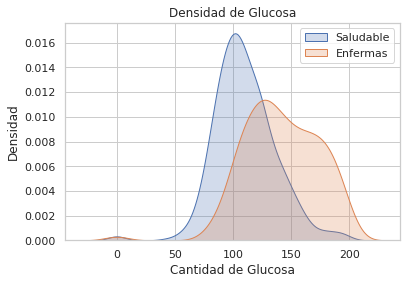

In [34]:
#Gráfica 3
healthy = diabetes[diabetes['outcome'] == 0]
sick = diabetes[diabetes['outcome'] == 1]

sns.distplot(healthy['glucose'], hist=False, kde_kws={'shade': True}, label="Saludable")
sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True}, label="Enfermas")

plt.title("Densidad de Glucosa")
plt.xlabel("Cantidad de Glucosa")
plt.ylabel("Densidad")
plt.legend(loc="upper right");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

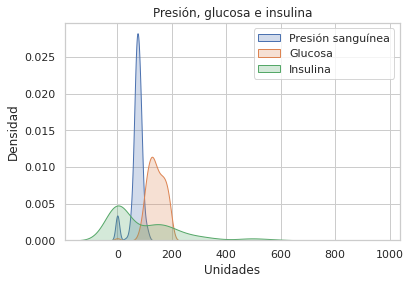

In [35]:
#Gráfica 4
sns.distplot(sick['blood_pressure'], hist=False, kde_kws={'shade': True}, label="Presión sanguínea")
sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True}, label="Glucosa")
sns.distplot(sick['insulin'], hist=False, kde_kws={'shade': True}, label="Insulina")

plt.title("Presión, glucosa e insulina")
plt.xlabel("Unidades")
plt.ylabel("Densidad")
plt.legend(loc="upper right");

**Ejemplo 2**
Gráfica de barras y la moda

- Aprender a realizar gráficas de barras con frecuencias y porcentajes

In [37]:
zomato = pd.read_json("/content/drive/MyDrive/Datasets/zomato_reviews-clean.json")
zomato.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [38]:
zomato['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [39]:
zomato['user_rating'].nunique()

6

In [40]:
counts = zomato['user_rating'].value_counts()
counts

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

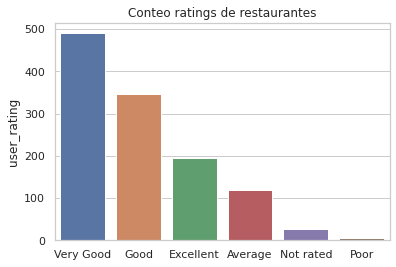

In [41]:
#Gráfica de barras
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title('Conteo ratings de restaurantes');

In [42]:
#Gráfica de barras como porcentaje
porcentajes = counts * 100 / counts.sum()

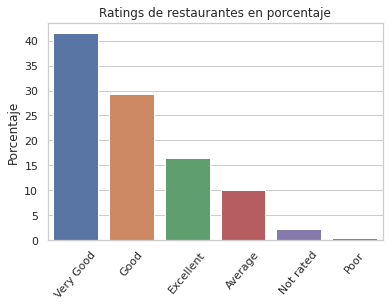

In [43]:
ax = sns.barplot(x=porcentajes.index, y=porcentajes)
ax.set_title('Ratings de restaurantes en porcentaje')
ax.set(ylabel='Porcentaje')
#Rotación de títulos
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

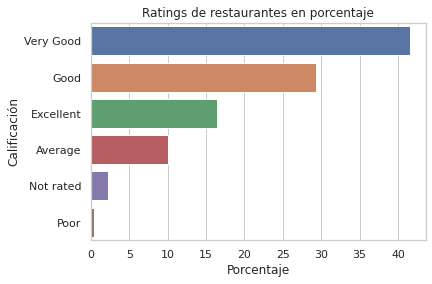

In [44]:
#Gráfica horizontal orient='h'
ax = sns.barplot(y=porcentajes.index, x=porcentajes, orient='h')
ax.set_title('Ratings de restaurantes en porcentaje')
ax.set(ylabel='Calificación')
ax.set(xlabel='Porcentaje');

**Reto 2**
Gráfica de barras

- Aprender a hacer gráficas de barras de distintos tipos

1. Gráfica de barras verticales usando la columna rooms. El eje y será el conteo de frecuencia de cada categoría. Las barras tienen que quedar ordenadas en orden descendente (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar la documentación de la gráfica de barras de Seaborn.
1. Gráfica de barras verticales de la columna types. El eje y será el porcentaje de frecuencia de cada categoría.
1. Gráfica de barras horizontales de la columna council_area. El eje x será el conteo de frecuencia* de cada categoría.

In [45]:
melbourne = pd.read_csv("/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv", sep=',', index_col=0)
melbourne.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [46]:
# 1. Gráfica rooms
cuartos = melbourne['rooms'].value_counts()

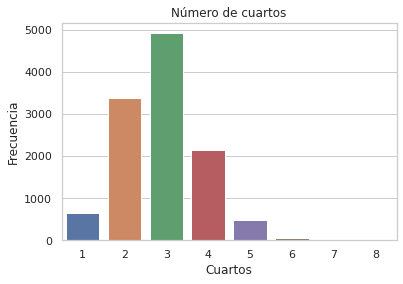

In [47]:
# 1. Gráfica rooms
ax = sns.barplot(x=cuartos.index, y=cuartos)
ax.set_title('Número de cuartos')
ax.set(ylabel='Frecuencia')
ax.set(xlabel='Cuartos');

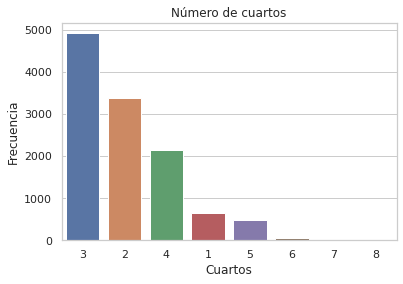

In [48]:
#Para ordenar de mayor a menor
ax = sns.barplot(x=cuartos.index, y=cuartos, order=cuartos.index)
ax.set_title('Número de cuartos')
ax.set(ylabel='Frecuencia')
ax.set(xlabel='Cuartos');

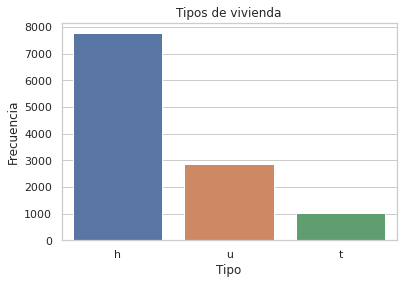

In [51]:
# 2. Gráfica type
ax = sns.countplot(x='type', data=melbourne)
ax.set_title('Tipos de vivienda')
ax.set(ylabel='Frecuencia')
ax.set(xlabel='Tipo');

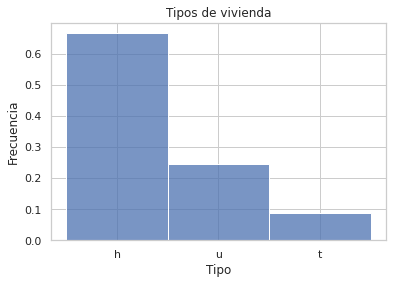

In [52]:
# 2. Gráfica type como porcentaje
ax = sns.histplot(x='type', data=melbourne, stat='probability')
ax.set_title('Tipos de vivienda')
ax.set(ylabel='Porcentaje')
ax.set(xlabel='Tipo');

In [ ]:
# 3.

**Ejemplo 3**
Tablas de contingencia

- Aprender a generar tablas de contingencia usando el método `crosstab`

In [53]:
#crosstab trae un conteo, rpimero le pasamos el eje de la x y después el eje de las y
crosstab = pd.crosstab(zomato['price_range'], zomato['user_rating'], margins=True, margins_name='Total')
# variable margins para agregar totales al final por fila y columna
crosstab

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,Total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
Total,119,194,346,26,5,490,1180


In [90]:
# agregar tupla [entre corchetes] con elementos para dividir la tabla
crosstab2 = pd.crosstab(zomato['price_range'], [zomato['has_online_delivery'], zomato['user_rating']])
crosstab2

has_online_delivery       0                 ...    1               
user_rating         Average Excellent Good  ... Good Poor Very Good
price_range                                 ...                    
1                        12         8   32  ...    1    0         4
2                        47        30  104  ...   12    1        33
3                        40        70  132  ...    9    0        35
4                        19        61   52  ...    4    0         8

[4 rows x 11 columns]

In [67]:
#Elegir los que no tienen delivery
crosstab.loc[:, 0]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,8,32,1,0,15
2,47,30,104,3,1,99
3,40,70,132,3,1,183
4,19,61,52,19,2,113


In [69]:
#Pasar más de un elemento con una tupla, por ejemplo
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

In [91]:
#Tabla con índices, por columna 1 o por renglón 0
crosstab2.stack(level=0)
#Nota: se puede guardar y exportar como un csv con .to_csv("tabla.csv")

user_rating                      Average  Excellent  ...  Poor  Very Good
price_range has_online_delivery                      ...                 
1           0                         12          8  ...     0         15
            1                          0          1  ...     0          4
2           0                         47         30  ...     1         99
            1                          0          7  ...     1         33
3           0                         40         70  ...     1        183
            1                          1         14  ...     0         35
4           0                         19         61  ...     2        113
            1                          0          3  ...     0          8

[8 rows x 6 columns]

**Reto 3**
Tablas de contingencias

- Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.

**a) Segmentando por tipo y número de cuartos**

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
1. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
1. Agrega los títulos y anotaciones necesarias.
1. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [56]:
#a1. Tabla de contingencias
crossmelb = pd.crosstab(melbourne['type'], melbourne['rooms'], margins=True, margins_name='Totales')
crossmelb

rooms,1,2,3,4,5,6,7,8,Totales
type,,,,,,,,,
h,54,1261,3912,1991,475,54,9,6,7762
t,9,299,575,138,4,0,0,0,1025
u,582,1829,429,17,0,1,0,1,2859
Totales,645,3389,4916,2146,479,55,9,7,11646


In [ ]:
#a2. Gráfica


**b) Segmentando por región, tipo y número de cuartos**

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
1. Usa el método stack para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
1. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'.
1. Tendrás que acceder a cada Serie usando una tupla para indicar los valores de los dos niveles del índice.
1. Anota tus gráficas adecuadamente.
1. Describe las similitudes y diferencias entre las 4 gráficas.

**Ejemplo 4**
Gráficas multiejes

- Aprender a generar varias gráficas al mismo tiempo para hacer comparaciones.

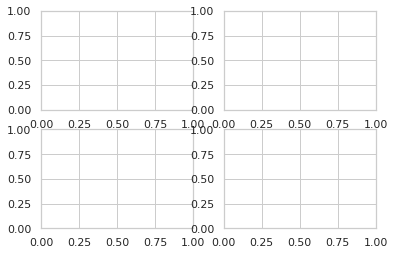

In [66]:
# subplots cuántas gráficas por el eje y y cuántas por el eje x
fig, axes = plt.subplots(2,2)

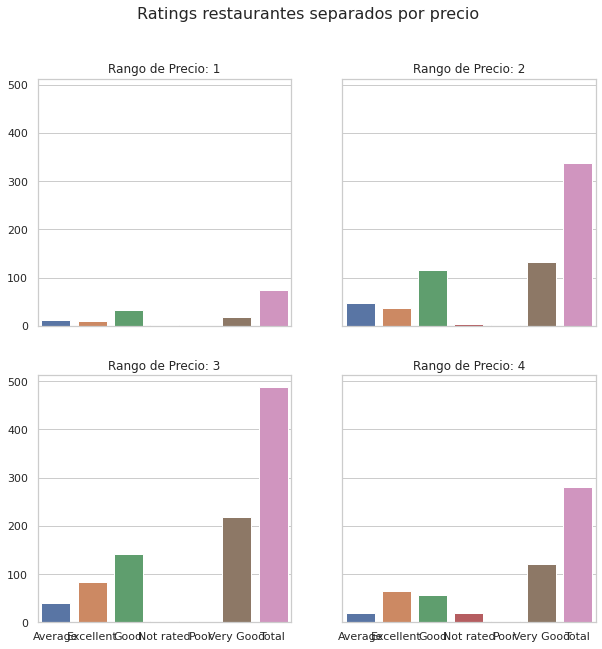

In [67]:
fig, axes = plt.subplots(2,2, figsize=(10,10), sharey=True, sharex=True)
#Gráficas con ubicación según nomenclatura de arrays (matrices empezando con 0)
sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[0,0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[2], ax=axes[0,1])
sns.barplot(x=crosstab.columns, y=crosstab.loc[3], ax=axes[1,0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[4], ax=axes[1,1])

#Títulos
fig.suptitle('Ratings restaurantes separados por precio', fontsize=16)

axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4');

**Reto 4**
Graficando múltiples axis

- Usar subplots para graficar múltiples gráficas de barras al mismo tiempo

1. Lee el dataset 'melbourne_housing-clean.csv'.
1. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
1. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
1. Asegúrate de que compartan eje x y y para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
1. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.


In [72]:
#Tabla de contingencia
crosst_melb = pd.crosstab(melbourne['region_name'], melbourne['type'], margins=True, margins_name='Total')
crosst_melb

type,h,t,u,Total
region_name,,,,
Eastern Metropolitan,863,102,159,1124
Eastern Victoria,33,0,3,36
Northern Metropolitan,2332,290,796,3418
Northern Victoria,21,1,0,22
South-Eastern Metropolitan,224,20,28,272
Southern Metropolitan,2360,386,1478,4224
Western Metropolitan,1908,226,394,2528
Western Victoria,21,0,1,22
Total,7762,1025,2859,11646


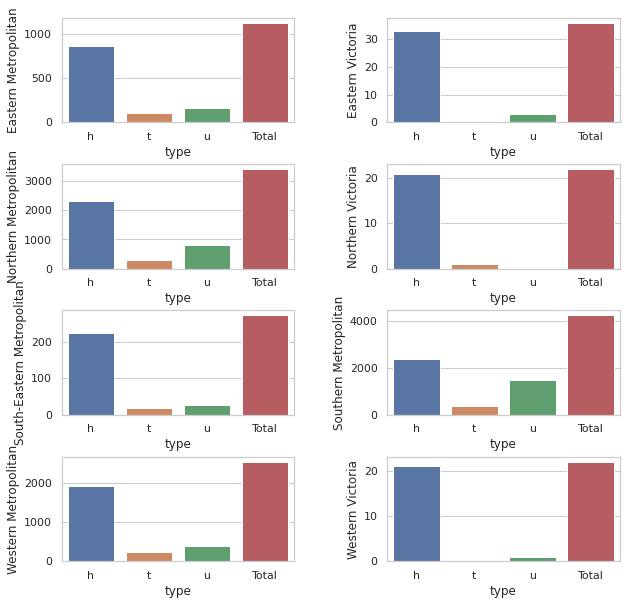

In [73]:
#Gráficas
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    sns.barplot(x=crosst_melb.columns, y=crosst_melb.iloc[i-1])

**Ejemplo 5**
Boxplot y Violinplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


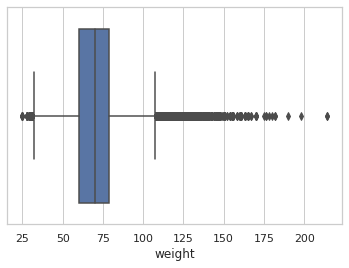

In [98]:
#Con el df de uegos olímpicos
sns.boxplot(df['weight'])

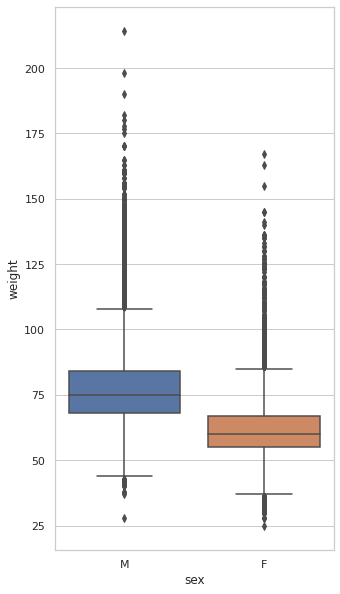

In [99]:
plt.figure(figsize=(5,10))
sns.boxplot(data=unidos, x='sex', y='weight');

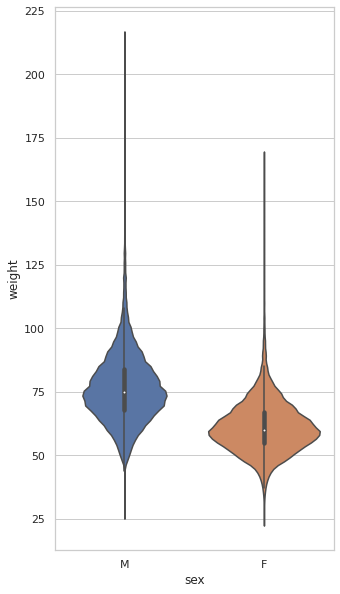

In [100]:
#Violinplot: entre boxplot+densidad
plt.figure(figsize=(5,10))
sns.violinplot(data=unidos, x='sex', y='weight');